#### This notebook contains all breakdowns of the gun deaths dataset (2012-2014)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read in cleaned dataset as dataframe in it's own jupyter notebook
data = pd.read_csv('CleanDatasets/gun_deaths.csv')
data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [3]:
# creating a grouping of the count of gun deaths by year
year_group = data['year']
year_group = year_group.value_counts().sort_index()
year_group = year_group.to_frame()
year_group

,year
2012,33563
2013,33636
2014,33599


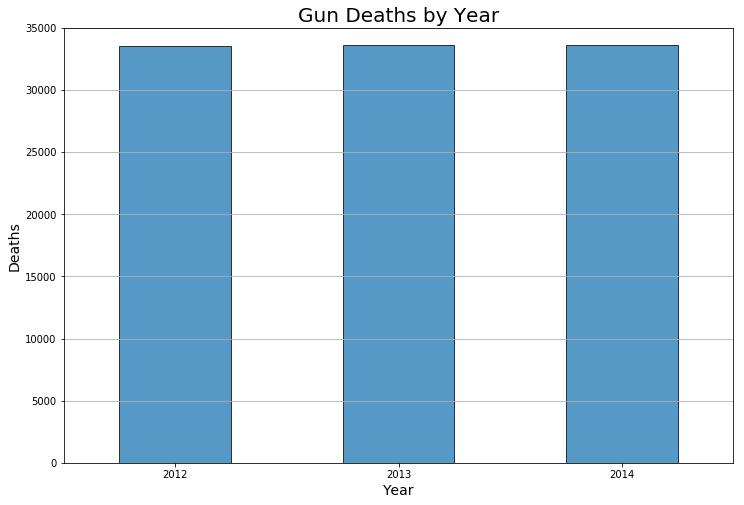

In [42]:
year_group.plot.bar(figsize=(12,8), alpha=.75, edgecolor='black')
plt.title('Gun Deaths by Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylim(0,35000)
plt.legend().remove()
plt.savefig('Figures/Gun_Deaths_Figures/deaths_by_year.png')

In [5]:
# creating a groupby object of intent by year death count
intent_data = data[['year','intent','sex']]
intent_data = intent_data.groupby(['year','intent']).count()
intent_data = intent_data.rename(columns={'sex':'deaths'})
intent_data = intent_data.reset_index()
intent_data = intent_data.set_index('year')
intent_data

,intent,deaths
year,,
2012,Accidental,548
2012,Homicide,12093
2012,Suicide,20666
2012,Undetermined,256
2013,Accidental,505
2013,Homicide,11674
2013,Suicide,21175
2013,Undetermined,281
2014,Accidental,586


In [6]:
data2012 = intent_data.loc[2012]
data2013 = intent_data.loc[2013]
data2014 = intent_data.loc[2014]

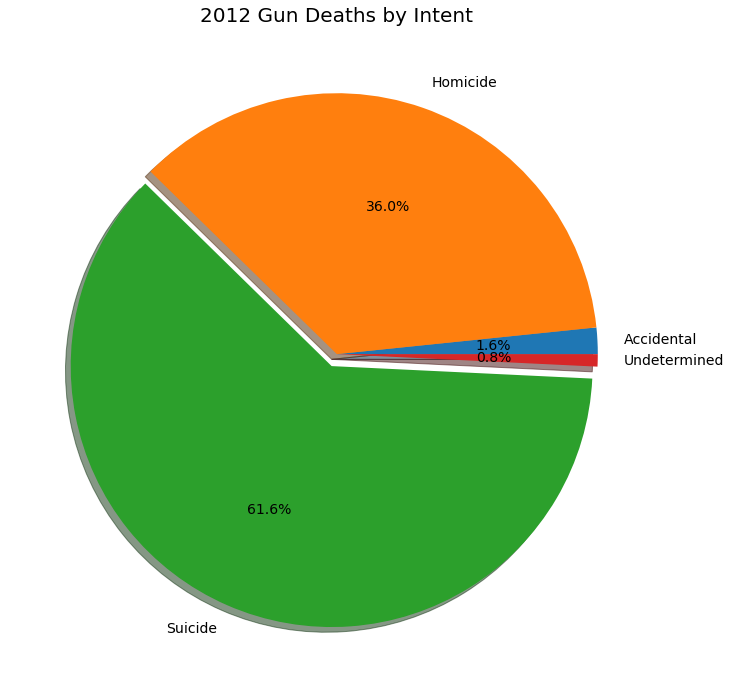

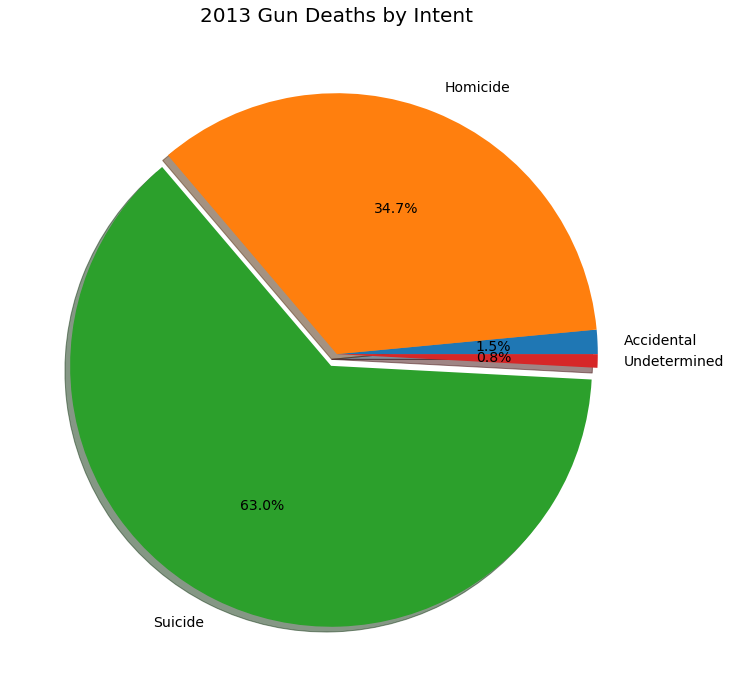

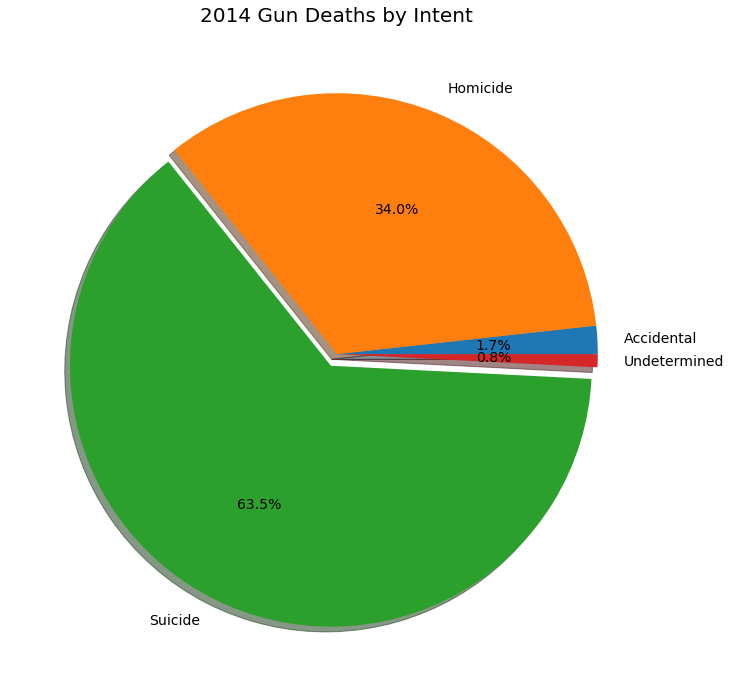

In [43]:
dataframes = [data2012,data2013,data2014]
start = 2012

for f in dataframes:
    fig1, ax1 = plt.subplots(figsize=(12,12))
    ax1.pie(f['deaths'], labels=f['intent'], autopct="%1.1f%%", explode=(0,0,0.05,0), shadow=True,textprops={'fontsize': 14})
    plt.title(str(start) + ' Gun Deaths by Intent', size=20)
    plt.savefig(f'Figures/Gun_Deaths_Figures/deaths_by_intent_{start}.png')

    start +=1
    

In [8]:
# creating a grouping of gun deaths by gender by year
gender_data = data[['year','sex','month']]
gender_data = gender_data.groupby(['year','sex']).count()
gender_data = gender_data.rename(columns={'month':'deaths'})
gender_data = gender_data.reset_index()
pivot = gender_data.pivot(index='year',columns='sex',values='deaths')
pivot

sex,F,M
year,,
2012,4725,28838
2013,4842,28794
2014,4882,28717


''

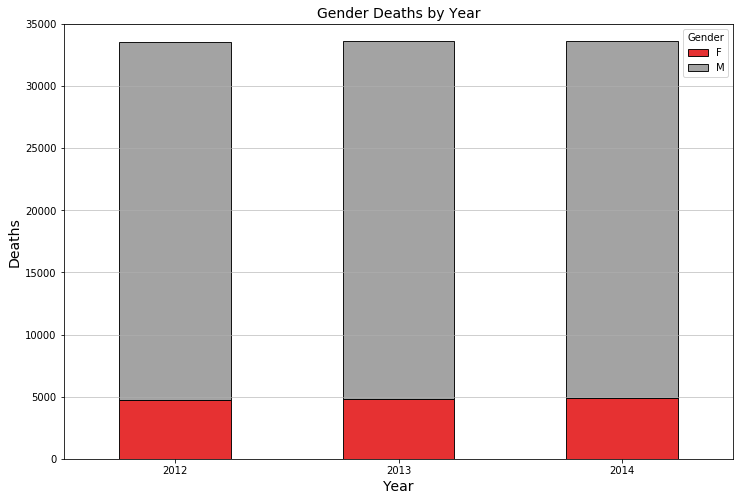

In [44]:
pivot.plot.bar(stacked=True, figsize=(12,8), alpha=.9, edgecolor='black', cmap='Set1')
plt.grid(axis='y', alpha=.75)
plt.title('Gender Deaths by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0,35000)
plt.legend(title='Gender')
plt.savefig('Figures/Gun_Deaths_Figures/gender_deaths_by_year.png')
;

In [10]:
# creating a grouping of deaths by race
race_data = data[['race','intent','month']]
race_data = race_data.groupby(['race','intent']).count()
race_data = race_data.rename(columns={'month':'deaths'})
race_data = race_data.reset_index()
race_pivot = race_data.pivot(index='race',columns='intent',values='deaths')
race_pivot

intent,Accidental,Homicide,Suicide,Undetermined
race,,,,
Asian/Pacific Islander,12,559,745,10
Black,328,19510,3332,126
Hispanic,145,5634,3171,72
Native American/Native Alaskan,22,326,555,14
White,1132,9147,55372,585


''

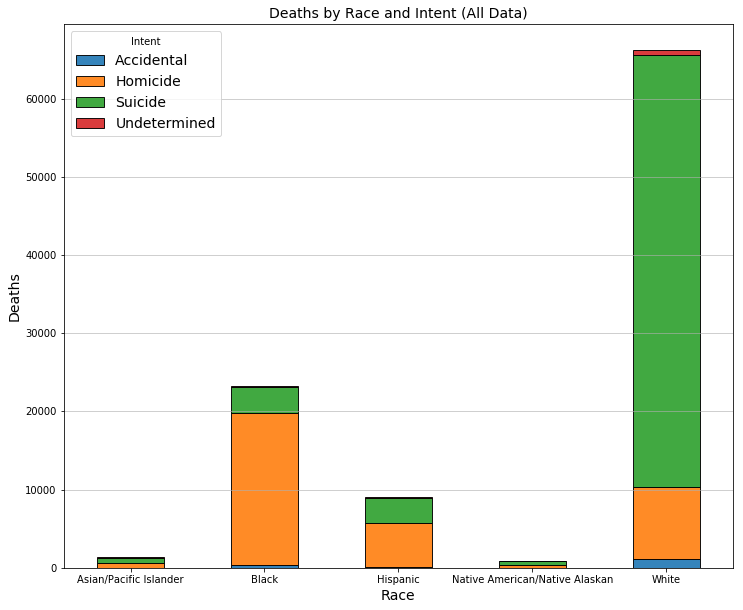

In [47]:
race_pivot.plot.bar(stacked=True, figsize=(12,10), alpha=.9, edgecolor='black')
plt.grid(axis='y', alpha=.75)
plt.title('Deaths by Race and Intent (All Data)', fontsize=14)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Intent', fontsize=14)
plt.savefig('Figures/Gun_Deaths_Figures/death_by_intent_race_alldata.png')
;

In [12]:
# creating a grouping of deaths by education level
edu_data = data[['year','month','education']]
edu_data = edu_data.groupby(['year','education']).count()
edu_data = edu_data.rename(columns={'month':'deaths'})
edu_data = edu_data.reset_index()
edu_data = edu_data.set_index('year')
edu_data

,education,deaths
year,,
2012,BA+,4175
2012,HS/GED,14210
2012,Less than HS,7523
2012,Some college,7163
2013,BA+,4407
2013,HS/GED,14366
2013,Less than HS,7161
2013,Some college,7250
2014,BA+,4364


In [13]:
edu2012 = edu_data.loc[2012]
edu2013 = edu_data.loc[2013]
edu2014 = edu_data.loc[2014]


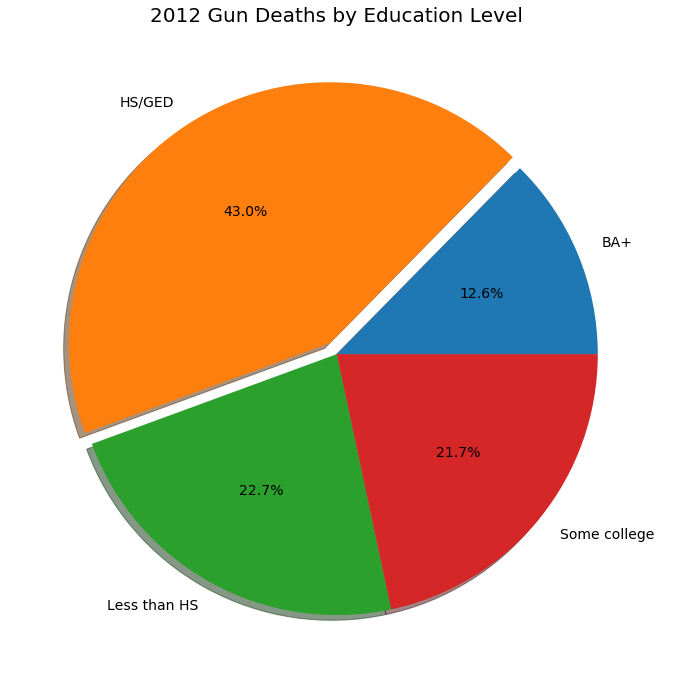

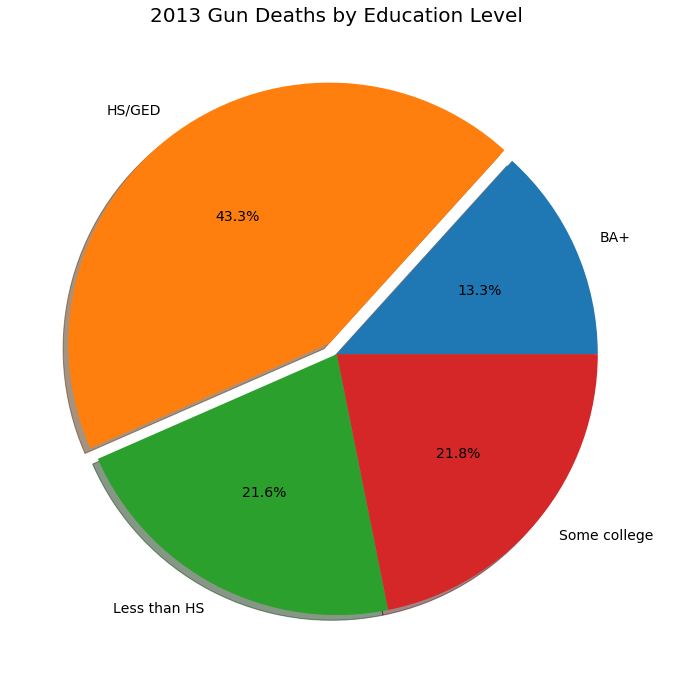

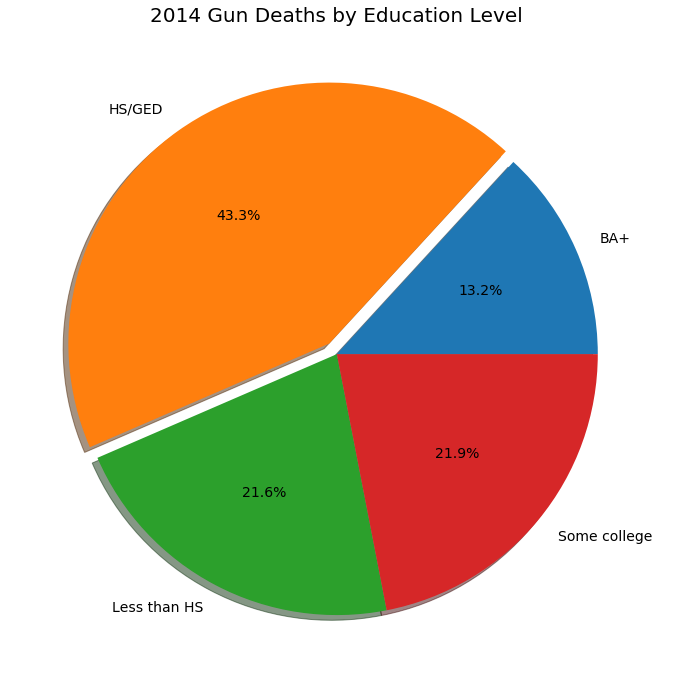

In [49]:
edu_years = [edu2012,edu2013,edu2014]
st = 2012

for f in edu_years:
    fig2, ax2 = plt.subplots(figsize=(12,12))
    ax2.pie(f['deaths'], labels=f['education'], autopct="%1.1f%%", explode=(0,0.05,0,0), shadow=True,textprops={'fontsize': 14})
    plt.title(str(st) + ' Gun Deaths by Education Level', size=20)
    plt.savefig(f'Figures/Gun_Deaths_Figures/death_by_edu_level_{st}.png')
    st +=1